## 首先 - 选择数据集

* [棒球赛数据](http://www.seanlahman.com/baseball-archive/statistics/)：这个数据集包括从 1871 年到 2014年完整的棒球赛击球和投球数据，还包括防守数据、排名、球队数据、管理记录、季后赛数据等等。这个数
据集含有很多文件，展开分析。

* 分析过程的5个步骤如下：

  1.提出问题 

  2.数据整理 

  3.探索阶段 

  4.结论 

  5.沟通

## 第一步 - 提出问题

1.运动员出生的月份是否集中，出生日期有什么特征吗？


2.棒球运动员的身高和体重是怎样的，是否与不同的时代有关？


3.运动员的能力与运动员的薪水是否有关系？

## 第二步 - 数据整理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


### 问题1：运动员的出生月份
 
**用到的文件：Master.csv**

In [2]:
# 读取文件 Master.csv 
master_df = pd.read_csv('Master.csv')
# 返回文件的前 5 行，查看数据情况
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [3]:
# 查看数据总的 行*列 数
master_df.shape

(19105, 24)

In [4]:
# 查看数据 缺失 情况，这是为了后面涉及数据计算时 缺失的数据无法参与计算，需要过滤掉
master_df.isnull().sum()

playerID           0
birthYear        132
birthMonth       302
birthDay         449
birthCountry      69
birthState       571
birthCity        180
deathYear       9664
deathMonth      9665
deathDay        9666
deathCountry    9669
deathState      9715
deathCity       9674
nameFirst         37
nameLast           0
nameGiven         37
weight           854
height           785
bats            1185
throws           979
debut            195
finalGame        195
retroID           56
bbrefID            2
dtype: int64

从数据缺失情况看，在19105条数据中， playerID 和 nameLast 最为完整。

和death相关的数据有较多空白，因为只有过世的运动员才有这部分数据。

In [5]:
# 分析出生月份，只需要两列
birthmonth_raw = master_df[['playerID','birthMonth']]

# 删除缺失的 行
birthmonth_df = birthmonth_raw.dropna()

# 查看删除缺失值后数据的 行*列
print(birthmonth_df.shape)

# 查看前5行数据情况
birthmonth_df.head()

(18803, 2)


,playerID,birthMonth
0,aardsda01,12.0
1,aaronha01,2.0
2,aaronto01,8.0
3,aasedo01,9.0
4,abadan01,8.0


### 问题2：棒球运动员的身高和体重
 
**用到的文件：Master.csv**

In [6]:
# 分析身高和体重，保留必要的列生成一个新文件
height_and_weight_raw = master_df[['playerID','birthYear','height','weight']]

# 删除出生年份、身高、体重中缺失数据的行
height_and_weight_df = height_and_weight_raw.dropna()

# 查看删除缺失值后数据的 行*列
print(height_and_weight_df.shape)

# 查看前5行数据情况
height_and_weight_df.head()

(18187, 4)


,playerID,birthYear,height,weight
0,aardsda01,1981.0,75.0,215.0
1,aaronha01,1934.0,72.0,180.0
2,aaronto01,1939.0,75.0,190.0
3,aasedo01,1954.0,75.0,190.0
4,abadan01,1972.0,73.0,184.0


In [7]:
# 根据运动员的出生年份划分4个区间：1900年之前、1900年到1940年、1940年到1980年、1980年之后

def convert_birthyear(birthyear):
    if birthyear < 1900:
        return '<1900'
    elif birthyear < 1940:
        return '[1900,1940)'
    elif birthyear < 1980:
        return '[1940,1980)'
    else:
        return '>=1980'

# 取出生日期那一列数据，然后使用 apply() 函数将这一列数据中的每个值作为参数传入convert_birthyear，从而获得出生日期的所属区间
period = height_and_weight_df['birthYear'].apply(convert_birthyear)

# 为了不更改原始数据，新定义一个变量
height_and_weight = height_and_weight_df

# 向新文件中 添加一列数据，即：出生日期的 所属区间
height_and_weight = height_and_weight.assign(period=period.values)

# 查看前5行数据        
height_and_weight.head()

,playerID,birthYear,height,weight,period
0,aardsda01,1981.0,75.0,215.0,>=1980
1,aaronha01,1934.0,72.0,180.0,"[1900,1940)"
2,aaronto01,1939.0,75.0,190.0,"[1900,1940)"
3,aasedo01,1954.0,75.0,190.0,"[1940,1980)"
4,abadan01,1972.0,73.0,184.0,"[1940,1980)"


In [8]:
# 由于不太熟悉pound和inch，为了直观的衡量，这里转换一下单位：把体重单位换为kg、把身高单位换为cm
# 1 pound = 0.4535924 kg
# 1 inch = 2.54 cm

def convert_unit(column):
    if column.name == "weight":
        return column * 0.4535924
    elif column.name == "height":
        return column * 2.54
    else:
        return column
    
# 新文件具有的数据：playerID、birthYear、height、weight、period，使用apply()函数 将体重 和 身高 的单位进行转化
height_and_weight = height_and_weight.apply(convert_unit)

# 查看前5行数据
height_and_weight.head()

,playerID,birthYear,height,weight,period
0,aardsda01,1981.0,190.50,97.522366,>=1980
1,aaronha01,1934.0,182.88,81.646632,"[1900,1940)"
2,aaronto01,1939.0,190.50,86.182556,"[1900,1940)"
3,aasedo01,1954.0,190.50,86.182556,"[1940,1980)"
4,abadan01,1972.0,185.42,83.461002,"[1940,1980)"


### 问题3：运动员的能力水平与薪水关系
**用到的文件：Batting.csv、 Salaries.csv**

In [9]:
# 读取文件 Batting.csv、Salaries.csv
batting_raw = pd.read_csv('Batting.csv')
salaries_raw = pd.read_csv('Salaries.csv')

# 返回文件的前 5 行，查看数据情况
batting_raw.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [10]:
# 返回文件的前 5 行，查看数据情况
salaries_raw.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [11]:
# 定义新变量，保存分析所需要的数据
batting_1 = batting_raw[['playerID','yearID','AB','H','HR','RBI']]

# 删除数据有缺失的行
batting_2 = batting_1.dropna()

# 查看 新文件的前5行数据
batting_2.head()

,playerID,yearID,AB,H,HR,RBI
0,abercda01,1871,4,0,0,0.0
1,addybo01,1871,118,32,0,13.0
2,allisar01,1871,137,40,0,19.0
3,allisdo01,1871,133,44,2,27.0
4,ansonca01,1871,120,39,0,16.0


In [12]:
# 为了计算打击率，去掉AB（除数）为0的数据，打击率 = H / AB
def remove_zero(item):
    if item == 0:
        return np.nan
    else:
        return item

batting_3 = batting_2['AB'].apply(remove_zero)
batting_4 = batting_2.assign(AB=batting_3)   
batting = batting_4.dropna()

# 查看 行*列
batting.shape

(87012, 6)

In [13]:
# 定义新变量，保存分析所需要的数据
salaries_df = salaries_raw[['playerID','yearID','salary']]

# 删除数据有缺失的行
salaries = salaries_df.dropna()

# 查看 新文件的前5行数据
salaries.head()

,playerID,yearID,salary
0,barkele01,1985,870000
1,bedrost01,1985,550000
2,benedbr01,1985,545000
3,campri01,1985,633333
4,ceronri01,1985,625000


In [14]:
# 定义 计算打击率 函数，保留3位小数
def batting_average(hits,at_bats):
    avg = float(hits) / float(at_bats)
    return round(avg, 3)

In [15]:
# 计算 打击率，这里使用的Python3，map函数返回的不再是list而是iterators, 所以想要使用，只用将iterator 转换成list 即可
AVG = list(map(batting_average, batting['H'], batting['AB']))

# 向文件中增加 打击率 一列
batting = batting.assign(AVG = AVG)

# 查看 新文件的前5行数据
batting.head()

,playerID,yearID,AB,H,HR,RBI,AVG
0,abercda01,1871,4.0,0,0,0.0,0.000
1,addybo01,1871,118.0,32,0,13.0,0.271
2,allisar01,1871,137.0,40,0,19.0,0.292
3,allisdo01,1871,133.0,44,2,27.0,0.331
4,ansonca01,1871,120.0,39,0,16.0,0.325


In [16]:
# 计算 打击率 的各项衡量指标
batting['AVG'].describe()

count    87012.000000
mean         0.208837
std          0.122426
min          0.000000
25%          0.147000
50%          0.231000
75%          0.274000
max          1.000000
Name: AVG, dtype: float64

## 第三步 - 数据探索
*** 问题1：运动员的出生日期 探索**

通过搜索得知，美国所有非学生组棒球队年龄分组日为7月31日，这也意味着，一个小选手如果他的出生日期恰好在7月31日以前，那么他将和其他比他大12个月之内的选手们分到同一年龄组，在青少年选手中，他的身体发育和心理成熟度相比于其他人的差异是不可忽视的。在未来不断的训练竞争和比赛中，劣势可能不断的累积。而一个恰好在8月出生的球员，由于在他的组别中生日最大，从一开始因发育凸显出的优势被放大，在今后的训练中，不断获得资源倾斜，积累优势，能够进入棒球职业联盟的几率大大增加。


**所以我们做出一个大胆的假设，在我们的职业棒球比赛数据中，7月31日以前临近月份出生的运动员，会明显少于7月31日以后临近月份出生的运动员。**

In [17]:
# 对master_df按出生月份分组，并返回 组的大小groupby.size(),as_index = True表示 把列当成索引
# 资料来源 http://blog.csdn.net/claroja/article/details/71080293?utm_source=itdadao&utm_medium=referral

grouped_by_birthmonth = birthmonth_df.groupby(['birthMonth'],as_index=True).size()
grouped_by_birthmonth

birthMonth
1.0     1631
2.0     1439
3.0     1528
4.0     1450
5.0     1449
6.0     1366
7.0     1503
8.0     1831
9.0     1661
10.0    1759
11.0    1620
12.0    1566
dtype: int64

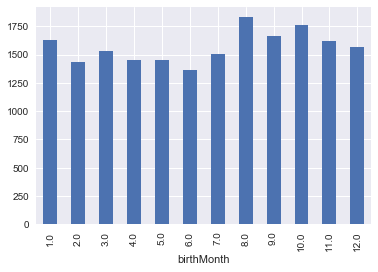

In [18]:
# 绘出直方图
grouped_by_birthmonth.plot(kind = 'bar')

**从图中可以观察到，职业棒球运动员的出生最多的月份为8月，但并不能完全证明是分组日对这一现象的影响。**

*** 问题2：运动员的身高和体重 探索**

In [19]:
# 运动员的平均身高/cm
height_and_weight['height'].mean()

183.61419365478

In [20]:
# 运动员的平均体重/kg
height_and_weight['weight'].mean()

84.57002965580152

In [21]:
# 按照 出生日期所属区间 进行分组
grouped_height_and_weight = height_and_weight.groupby(['period'],as_index=True)

# 计算 每组出生日期 的身高和体重的 平均值
grouped_height_and_weight['height','weight'].mean()

,height,weight
period,,
<1900,178.601440,77.679562
>=1980,187.297595,95.090602
"[1900,1940)",182.809656,82.145657
"[1940,1980)",186.172766,86.693830


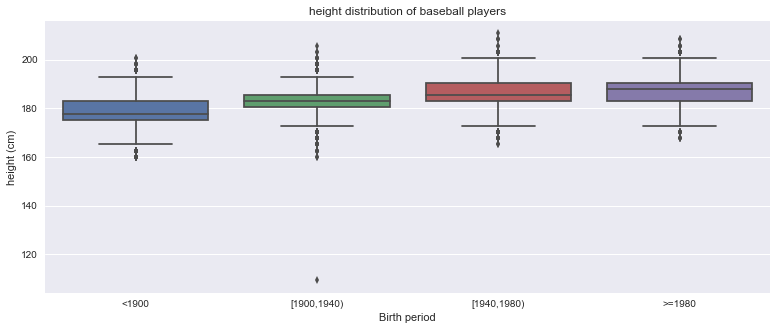

In [22]:
# 设定图像大小
figure = plt.figure(figsize=(13, 5))

# 绘制箱线图
ax = sns.boxplot(x="period", y="height", data=height_and_weight, order=['<1900','[1900,1940)','[1940,1980)','>=1980'])
texts = ax.set(xlabel='Birth period', ylabel='height (cm)', title='height distribution of baseball players')

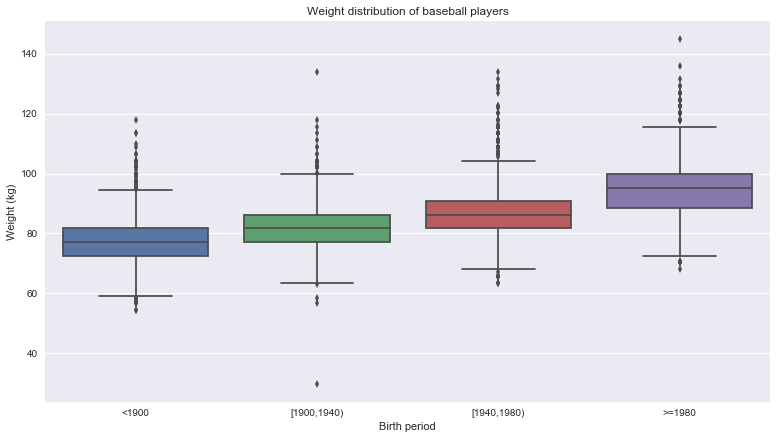

In [23]:
# 设定图像大小
figure = plt.figure(figsize=(13, 7))

# 绘制箱线图
ax = sns.boxplot(x="period", y="weight", data=height_and_weight,order=['<1900','[1900,1940)','[1940,1980)','>=1980'])
texts = ax.set(xlabel='Birth period', ylabel='Weight (kg)', title='Weight distribution of baseball players')

**从箱线图中可以观察到，随时间的变化，职业棒球运动员的 平均身高 和 平均体重 有增长的趋势。**

**同时，在身高和体重的分布中也均有一些 异常值 在分布在最大值的位置。**

*** 问题3：运动员的能力水平与薪水的关系**

In [24]:
# 合并batting和salaries
batting_salaries = pd.merge(batting, salaries, on=['playerID','yearID'])

# 查看合并后新文件的前5行 数据
batting_salaries.head()

,playerID,yearID,AB,H,HR,RBI,AVG,salary
0,aguaylu01,1985,165.0,46,6,21.0,0.279,237000
1,allenne01,1985,2.0,0,0,0.0,0.000,750000
2,almonbi01,1985,244.0,66,6,29.0,0.270,255000
3,anderla02,1985,4.0,0,0,0.0,0.000,250500
4,andujjo01,1985,94.0,10,0,8.0,0.106,1030000


In [25]:
# 为避免极端值的影响，选择中位数来划分薪水
m = batting_salaries['salary'].median()
print(m)

650000.0


In [26]:
# 将薪水与中位数进行比较，大于中位数的作为高薪水，小于中位数的作为低薪水
def convert_salary(salary):
    if salary >= m:
        return 'High salary'
    else:
        return 'Low salary'

# 判断运动的薪水水平
salary_level = batting_salaries['salary'].apply(convert_salary)

# 将薪水水平添加到运动员的薪水文件中
batting_salaries = batting_salaries.assign(salary_level=salary_level)

# 查看前5行数据
batting_salaries.head()

,playerID,yearID,AB,H,HR,RBI,AVG,salary,salary_level
0,aguaylu01,1985,165.0,46,6,21.0,0.279,237000,Low salary
1,allenne01,1985,2.0,0,0,0.0,0.000,750000,High salary
2,almonbi01,1985,244.0,66,6,29.0,0.270,255000,Low salary
3,anderla02,1985,4.0,0,0,0.0,0.000,250500,Low salary
4,andujjo01,1985,94.0,10,0,8.0,0.106,1030000,High salary


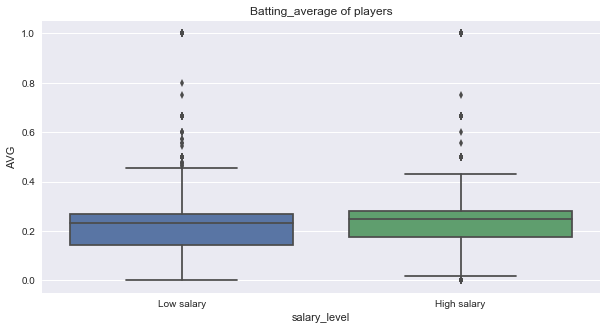

In [27]:
# 按照薪水水平进行分组
grouped_salary = batting_salaries.groupby(['salary_level'], as_index = True)

# 设定图像大小
figure = plt.figure(figsize=(10, 5))

# 绘制箱线图
ax = sns.boxplot(x="salary_level", y="AVG", data=batting_salaries)
texts = ax.set(xlabel='salary_level', ylabel='AVG', title='Batting_average of players')

**在打击率这一指标上，观察箱线图的中位数和四分位数，薪水高的运动员打击率高于薪水低的运动员。**

**打击率是一个0到1范围内的数值，一般运动员的打击率值在0.2-0.4，所以从图中的四分位数的分布来看，高薪水运动员还是有一定的优势。**

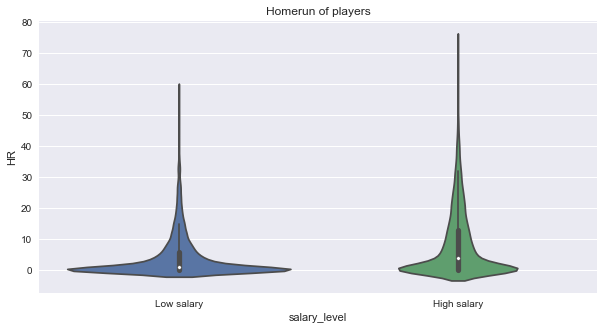

In [28]:
# 全垒打
grouped_salary = batting_salaries.groupby(['salary_level'], as_index = True)

# 设定图像大小
figure = plt.figure(figsize=(10, 5))

# 绘制提琴图
ax = sns.violinplot(x="salary_level", y="HR", data=batting_salaries)
texts = ax.set(xlabel='salary_level', ylabel='HR', title='Homerun of players')

**提琴图的中心白点为中位数。**

**在低薪水运动员中几乎没有人能打出60以上的全垒打。两组均有较多的运动员数据较低，但明显低薪水组运动员更多地分布在数值偏低的位置。**

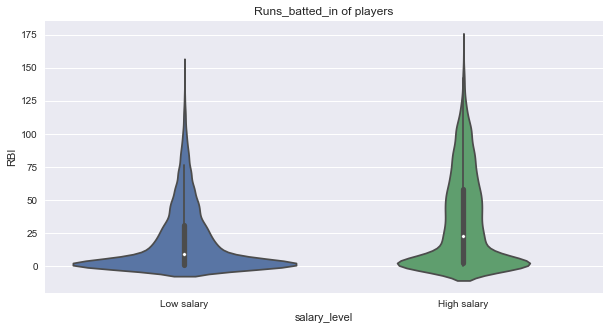

In [29]:
# 打点
grouped_salary = batting_salaries.groupby(['salary_level'], as_index = True)

# 设定图像大小
figure = plt.figure(figsize=(10, 5))

# 绘制提琴图
ax = sns.violinplot(x="salary_level", y="RBI", data=batting_salaries)
texts = ax.set(xlabel='salary_level', ylabel='RBI', title='Runs_batted_in of players')

**打点 用来衡量一个球员靠打击攻进的分数，一般高于80即可视为一个攻击力不错的强棒，相反如果较低，可能是 防守 好于 进攻 的弱棒。**

**从上图的分布来看，高薪水组相比于低薪水组更多的 向上分布，即 高薪水组的 打点 更高。**

## 第四步 - 结论

1、 关于棒球运动员出生月份的问题，统计结果显示更多的运动员出生在8月，即出生月份更多的在年轻运动员分组日（7月31日）之后，印证了此前关于分组日

    对进入到职业联盟的棒球运动员影响的假设，会使得刚好在分组日之后出生的运动员有一定的优势。但不能说明二者有因果关系，还有很多其他主要因素
    
    的影响，只能说存在相关的可能性。

2、 从棒球运动员的身高体重来看，平均身高183.61cm，平均体重84.57kg，如果有其他体育项目运动员的身高体重数据，就可以发现不同项目运动员身材的

    差异。
    
    另外，随时间的变化，目前数据中，晚出生的运动员较之前出生运动员，平均身高更高，平均体重更重。样本剔除了缺失的部分数据，不过仍是一个样本
    
    数较大的样本，可能存在与总体的偏差，但在这个分析中，我们将此样本视为对总体的估计。

3、 关于打击数据与运动员薪水的问题，我们发现高薪水组相比于低薪水组在三项打击数据上有一定的优势，不过此分析存在着诸多限制。
   
   * 首先，对薪水的分组，没有找到更好的方式去界定薪水的高低，可能不同的分组方式对结果也会有不同的影响。 
   
   
   * 其次，选取了三项数据来反映运动员的打击水平，但其实这样的衡量也并不全面，运动员的风格不同会造成在各项数据上的差异，同时还有其他次要方面如
     安打、得分、上垒率、长打率等来反映运动员能力。 
     
   
   * 最后，本次分析尝试过去除数据中的异常值（如打击率极高可能是因为打数过少），但因为无法清晰界定是否为异常而保留了数据。对数据的处理方式对结
     论也会产生一定的影响。

## 参考资料

* Python for Data Analysis
* Udacity论坛
* pandas官方文档
* github
* csdn